<a href="https://colab.research.google.com/github/pedrocrf/Analise-de-dados-de-vendas/blob/main/%5BDaron_Analytics%5D%20Case%20-%20Dados%20de%20Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importar Bibliotecas, Carregar Dados e Configurar Bibliotecas de Gráficos
Importar as bibliotecas necessárias para a análise, carregar o arquivo CSV contendo os dados de vendas e configurar o estilo dos gráficos.

In [23]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar a formatação para evitar notação científica
pd.options.display.float_format = '{:,.2f}'.format

# Carregar o arquivo CSV
file_path = '/content/dados_vendas.csv'  # Atualize o caminho para o seu arquivo
dados_vendas = pd.read_csv(file_path)

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Mostrar as primeiras linhas do dataframe para entender a estrutura dos dados
dados_vendas.head()

,Data,Produto,Categoria,Preço,Quantidade,Receita,Região
0,2023-10-19,Produto D,Categoria 1,489.40,36.00,"17,618.40",Região Leste
1,2022-01-04,Produto E,Categoria 2,43.85,51.00,"2,236.35",Região Leste
2,2023-09-11,Produto A,Categoria 1,156.26,82.00,"12,813.32",Região Leste
3,2022-08-04,Produto C,Categoria 1,58.69,50.00,"2,934.50",Região Leste
4,2022-01-06,Produto E,Categoria 2,430.99,55.00,"23,704.45",Região Oeste


<Figure size 1200x600 with 0 Axes>

### Verificar e Limpar a Coluna de Data
Verificar e limpar a coluna de data para garantir que todos os valores sejam válidos e estejam no formato correto.

In [24]:
# Verificar valores únicos na coluna 'Data'
dados_vendas['Data'].unique()

# Remover espaços em branco e caracteres indesejados
dados_vendas['Data'] = dados_vendas['Data'].str.strip()

# Verificar novamente valores únicos na coluna 'Data'
dados_vendas['Data'].unique()

array(['2023-10-19', '2022-01-04', '2023-09-11', '2022-08-04',
       '2022-01-06', '2023-03-24', '2022-06-07', '2023-08-26',
       '2022-09-22', '2023-02-12', '2022-01-13', '2023-08-27',
       '2023-05-10', '2023-08-31', '2022-12-23', '2022-10-02',
       '2022-10-30', '2022-09-09', '2023-08-06', '2022-04-04',
       '2023-07-24', '2022-01-31', '2022-10-28', '2023-05-11',
       '2022-04-14', '2022-11-06', '2022-11-25', '2022-04-08',
       '2023-04-15', '2023-02-15', '2022-02-21', '2023-07-21',
       '2022-01-27', '2022-04-26', '2022-12-31', '2023-11-16',
       '2023-03-03', '2023-07-08', '2022-10-31', '2023-03-18',
       '2023-06-23', '2022-06-09', '2023-11-09', '2022-12-08',
       '2023-05-15', '2023-11-24', '2022-10-10', '2022-10-23',
       '2022-06-12', '2023-04-06', '2023-09-22', '2023-01-20',
       '2022-08-22', '2022-06-04', '2022-10-05', '2023-05-20',
       '2023-09-15', '2022-05-31', '2022-06-30', '2022-10-18',
       '2023-06-03', '2022-07-27', '2022-05-08', '2022-

### Converter a Coluna de Data e Analisar Tendências de Vendas ao Longo do Tempo
Converter a coluna de data para o tipo datetime, remover datas inválidas e analisar as tendências de vendas ao longo do tempo.

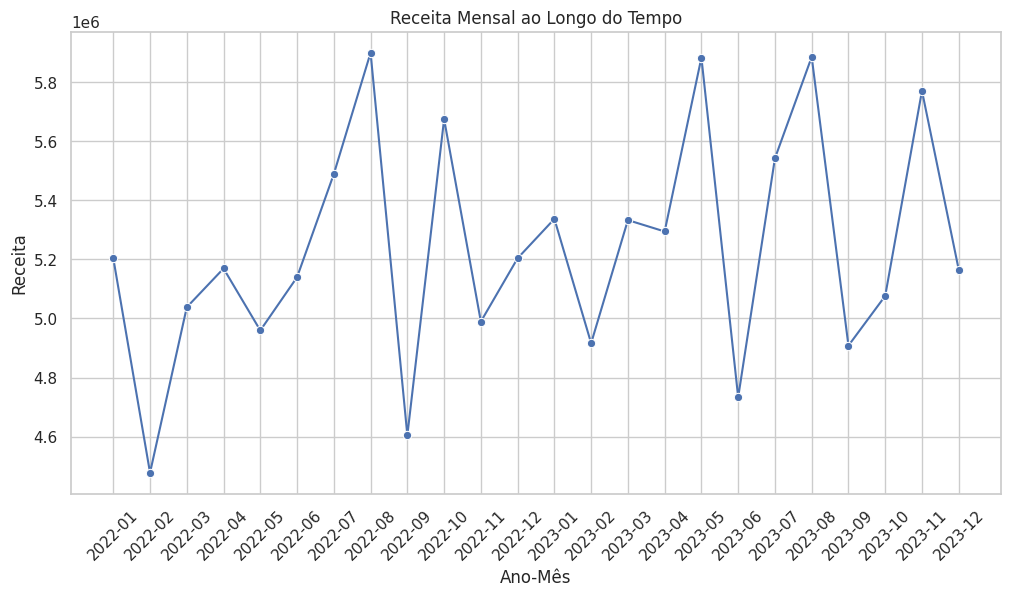

In [25]:
# Converter a coluna de Data para o tipo datetime, ignorando erros
dados_vendas['Data'] = pd.to_datetime(dados_vendas['Data'], errors='coerce')

# Remover linhas com datas inválidas (NaT)
dados_vendas = dados_vendas.dropna(subset=['Data'])

# Agrupar por ano e mês, e calcular a receita total para cada mês
dados_vendas['AnoMes'] = dados_vendas['Data'].dt.to_period('M')
receita_mensal = dados_vendas.groupby('AnoMes')['Receita'].sum().reset_index()

# Converter AnoMes para string para garantir que seja plotável
receita_mensal['AnoMes'] = receita_mensal['AnoMes'].astype(str)

# Plotar a receita mensal
plt.figure(figsize=(12, 6))
sns.lineplot(data=receita_mensal, x='AnoMes', y='Receita', marker='o')
plt.title('Receita Mensal ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.show()

### Análise Sazonal
Analisar a sazonalidade das vendas ao longo dos meses para identificar padrões sazonais.

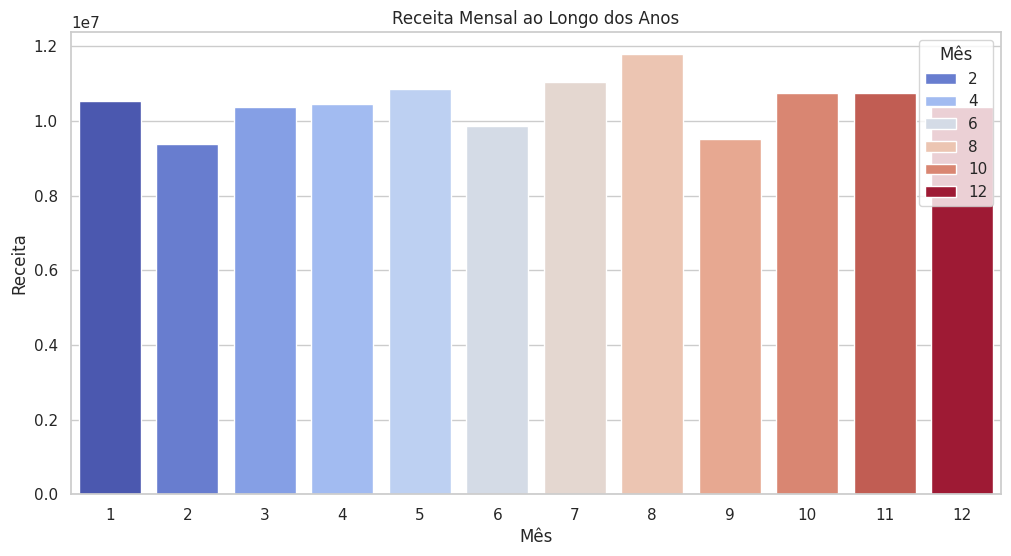

In [26]:
dados_vendas['Mes'] = dados_vendas['Data'].dt.month
receita_mensal_sazonal = dados_vendas.groupby('Mes')['Receita'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=receita_mensal_sazonal, x='Mes', y='Receita', hue='Mes', palette='coolwarm', dodge=False)
plt.title('Receita Mensal ao Longo dos Anos')
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.legend(title='Mês', loc='upper right')
plt.show()

### Receita e Quantidade Vendida por Produto e Categoria
Analisar a receita e a quantidade vendida por produto e por categoria para identificar os itens mais vendidos e os mais lucrativos.

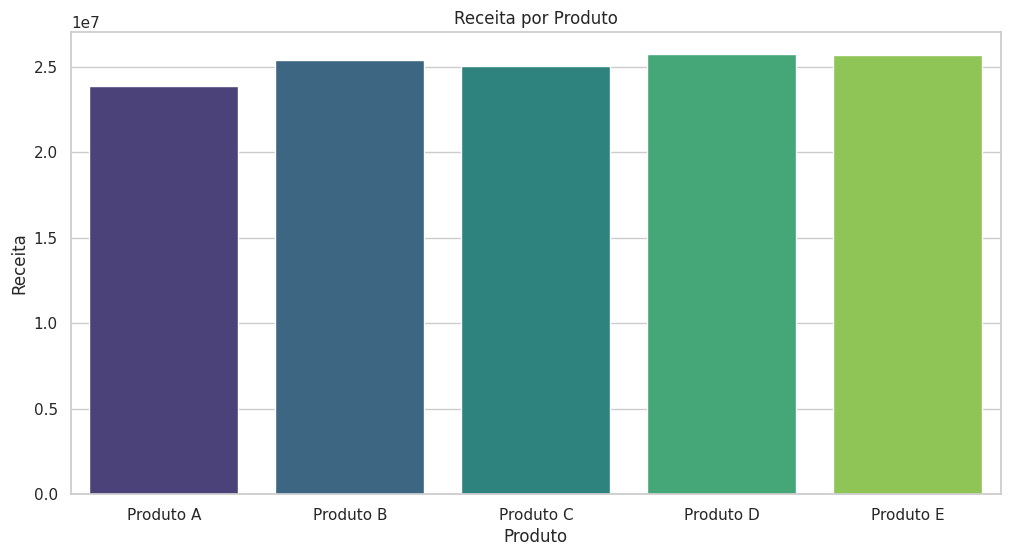

<Figure size 640x480 with 0 Axes>

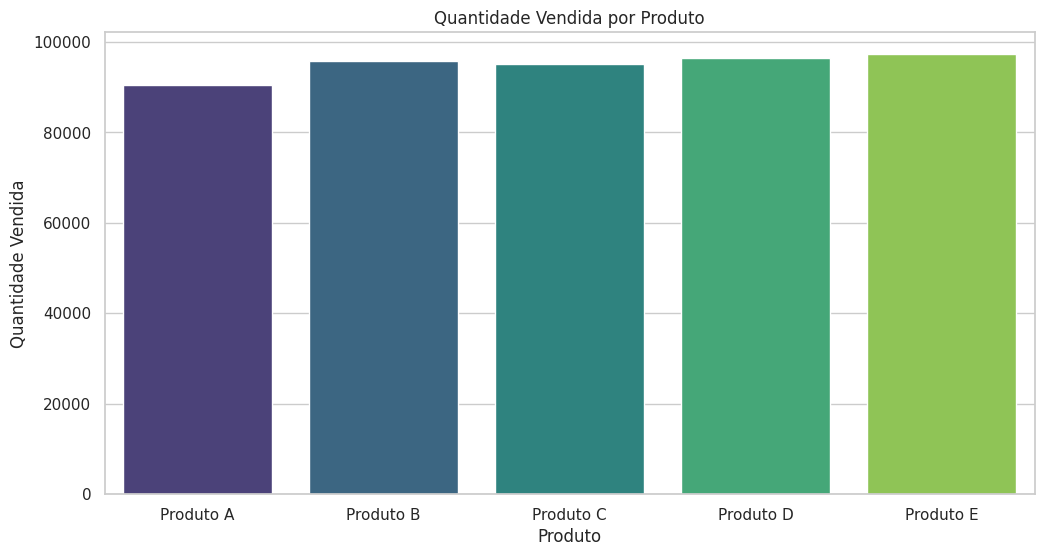

<Figure size 640x480 with 0 Axes>

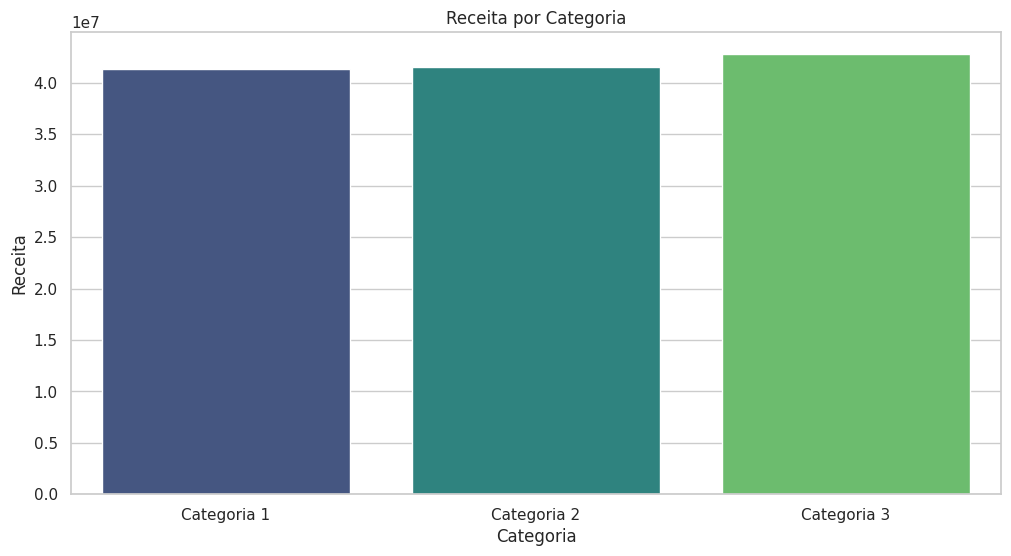

<Figure size 640x480 with 0 Axes>

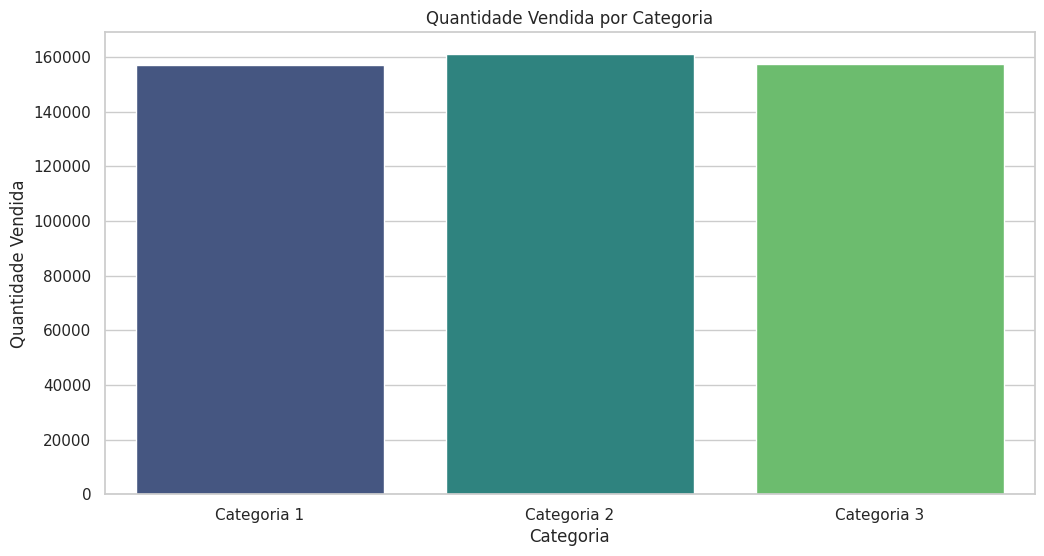

In [27]:
# Agrupar por produto e calcular a receita total e quantidade vendida
produto_analise = dados_vendas.groupby('Produto').agg({'Receita': 'sum', 'Quantidade': 'sum'}).reset_index()

# Agrupar por categoria e calcular a receita total e quantidade vendida
categoria_analise = dados_vendas.groupby('Categoria').agg({'Receita': 'sum', 'Quantidade': 'sum'}).reset_index()

# Plotar a receita por produto
plt.figure(figsize=(12, 6))
sns.barplot(data=produto_analise, x='Produto', y='Receita', hue='Produto', palette='viridis', dodge=False)
plt.title('Receita por Produto')
plt.xlabel('Produto')
plt.ylabel('Receita')
plt.legend([],[], frameon=False)
plt.show()

# Limpar a figura atual
plt.clf()

# Plotar a quantidade vendida por produto
plt.figure(figsize=(12, 6))
sns.barplot(data=produto_analise, x='Produto', y='Quantidade', hue='Produto', palette='viridis', dodge=False)
plt.title('Quantidade Vendida por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.legend([],[], frameon=False)
plt.show()

# Limpar a figura atual
plt.clf()

# Plotar a receita por categoria
plt.figure(figsize=(12, 6))
sns.barplot(data=categoria_analise, x='Categoria', y='Receita', hue='Categoria', palette='viridis', dodge=False)
plt.title('Receita por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Receita')
plt.legend([],[], frameon=False)
plt.show()

# Limpar a figura atual
plt.clf()

# Plotar a quantidade vendida por categoria
plt.figure(figsize=(12, 6))
sns.barplot(data=categoria_analise, x='Categoria', y='Quantidade', hue='Categoria', palette='viridis', dodge=False)
plt.title('Quantidade Vendida por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.legend([],[], frameon=False)
plt.show()

### Estatísticas Descritivas dos Preços e Quantidades Vendidas
Calcular e visualizar as estatísticas descritivas dos preços e das quantidades vendidas.

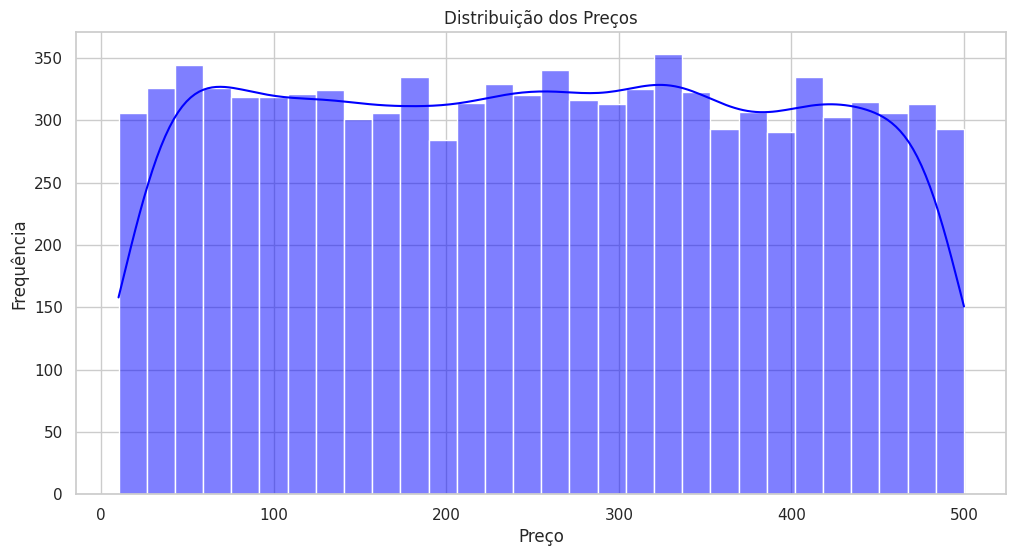

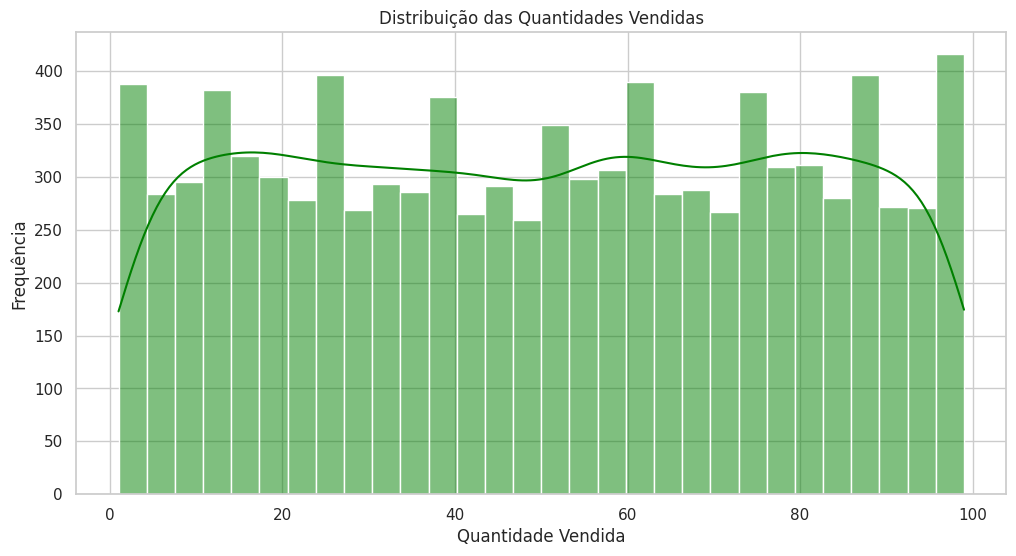

In [28]:
# Estatísticas descritivas para os preços
estatisticas_precos = dados_vendas['Preço'].describe()

# Estatísticas descritivas para as quantidades vendidas
estatisticas_quantidade = dados_vendas['Quantidade'].describe()

# Plotar a distribuição dos preços
plt.figure(figsize=(12, 6))
sns.histplot(dados_vendas['Preço'], kde=True, bins=30, color='blue')
plt.title('Distribuição dos Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# Plotar a distribuição das quantidades vendidas
plt.figure(figsize=(12, 6))
sns.histplot(dados_vendas['Quantidade'], kde=True, bins=30, color='green')
plt.title('Distribuição das Quantidades Vendidas')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Frequência')
plt.show()

### Analisar Receita por Região
Analisar a receita por região para entender o desempenho das vendas em diferentes localidades.

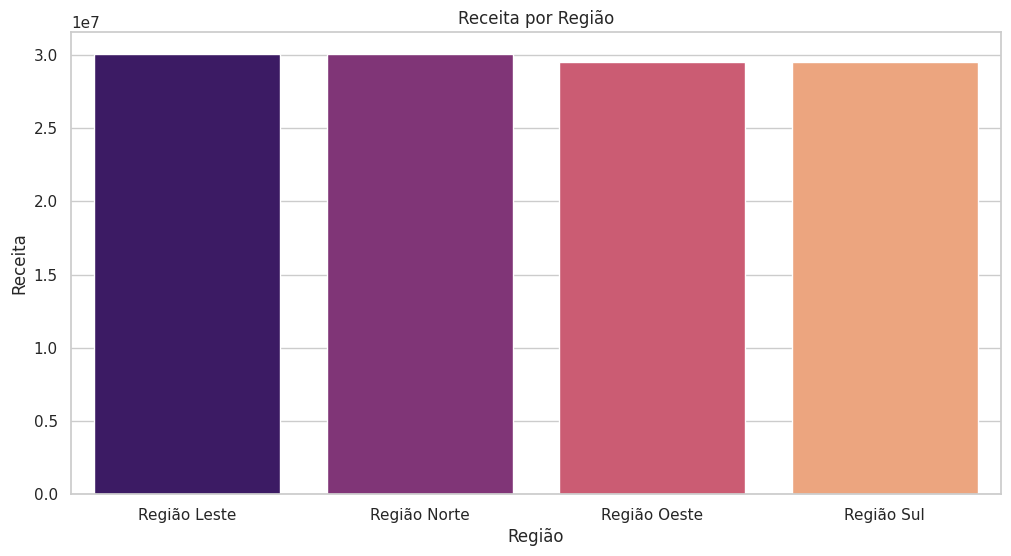

In [29]:
# Agrupar por região e calcular a receita total
regiao_analise = dados_vendas.groupby('Região')['Receita'].sum().reset_index()

# Plotar a receita por região
plt.figure(figsize=(12, 6))
sns.barplot(data=regiao_analise, x='Região', y='Receita', hue='Região', palette='magma', dodge=False)
plt.title('Receita por Região')
plt.xlabel('Região')
plt.ylabel('Receita')
plt.legend([],[], frameon=False)
plt.show()

### Análise de Produtos Mais Vendidos
Identificar os produtos mais vendidos tanto em termos de receita quanto em quantidade.


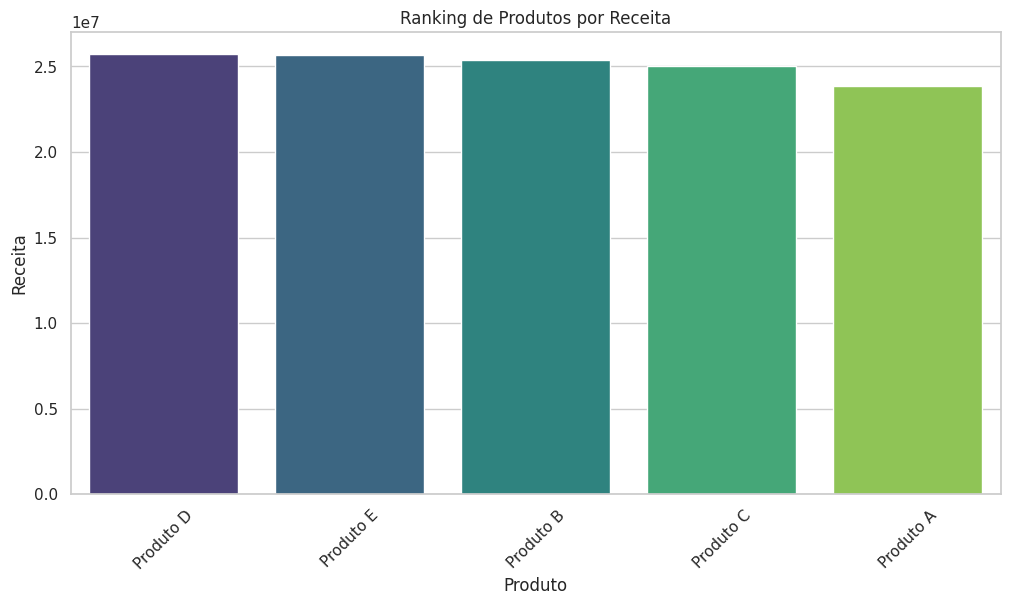

<Figure size 640x480 with 0 Axes>

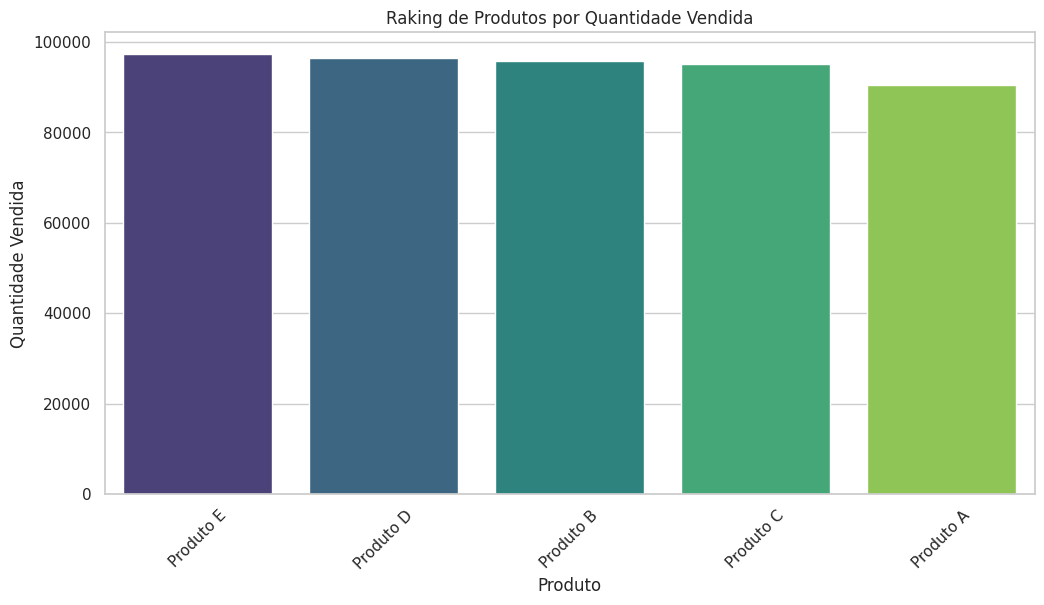

<Figure size 640x480 with 0 Axes>

In [30]:
top_produtos_receita = dados_vendas.groupby('Produto')['Receita'].sum().reset_index().sort_values(by='Receita', ascending=False).head(10)
top_produtos_quantidade = dados_vendas.groupby('Produto')['Quantidade'].sum().reset_index().sort_values(by='Quantidade', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_produtos_receita, x='Produto', y='Receita', hue='Produto', palette='viridis', dodge=False)
plt.title('Ranking de Produtos por Receita')
plt.xlabel('Produto')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()

# Limpar a figura atual
plt.clf()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_produtos_quantidade, x='Produto', y='Quantidade', hue='Produto', palette='viridis', dodge=False)
plt.title('Raking de Produtos por Quantidade Vendida')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()

# Limpar a figura atual
plt.clf()

###Análise de Correlação
Calcular e visualizar a matriz de correlação para entender as relações entre preço, quantidade e receita.

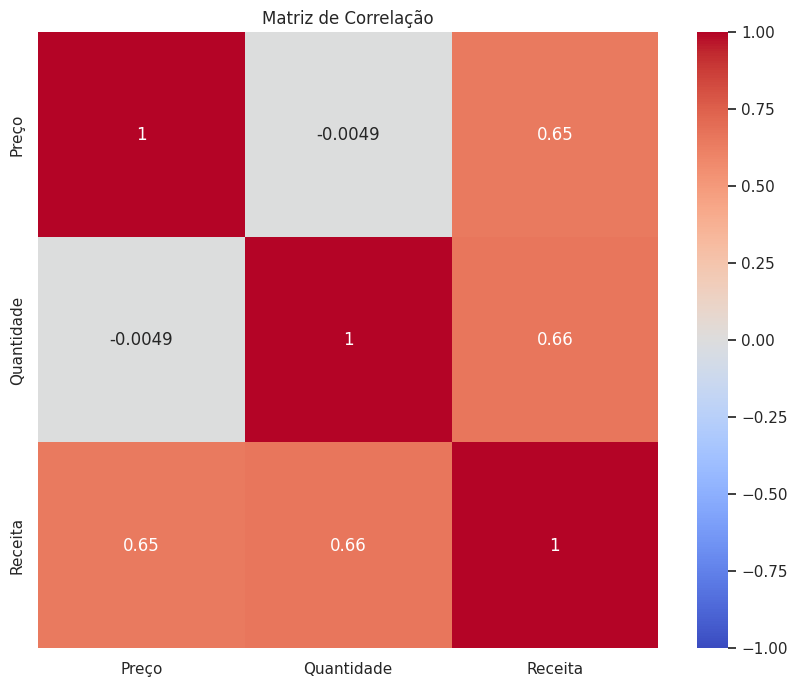

In [31]:
# Análise de Correlação
correlacao = dados_vendas[['Preço', 'Quantidade', 'Receita']].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

#### Verificar a Frequência de Produtos por Região

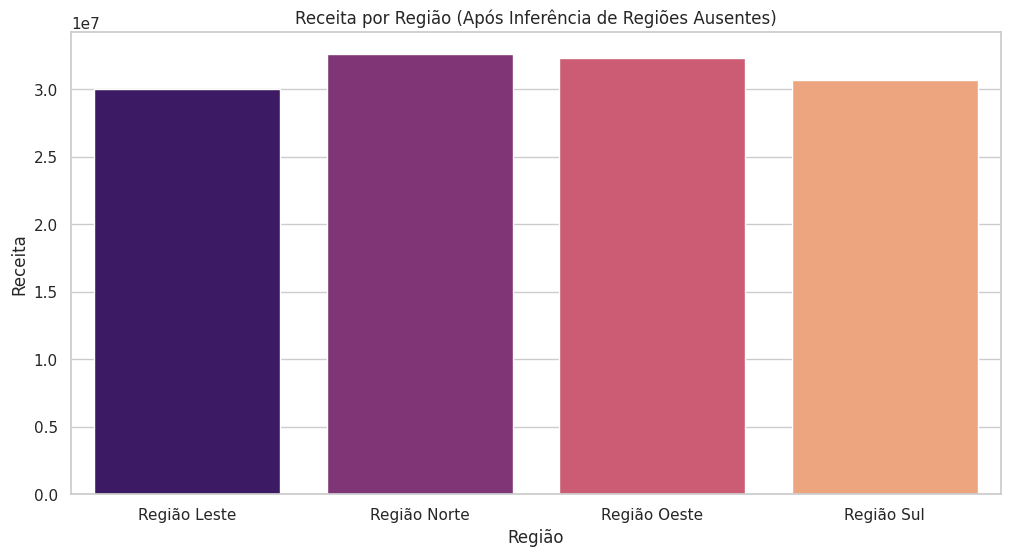

In [32]:
# Filtrar dados com região preenchida
dados_com_regiao = dados_vendas[dados_vendas['Região'].notna()]

# Contar a frequência de cada produto por região
frequencia_produto_regiao = dados_com_regiao.groupby(['Produto', 'Região']).size().unstack(fill_value=0)

# Mostrar a frequência de produtos por região
frequencia_produto_regiao

# Inferir Regiões Ausentes com Base na Frequência dos Produtos
# Criar um dicionário para mapear produtos para suas regiões mais frequentes
produto_para_regiao_mais_frequente = frequencia_produto_regiao.idxmax(axis=1).to_dict()

# Preencher as regiões ausentes com base no produto mais frequente
dados_vendas['Região'] = dados_vendas.apply(
    lambda row: produto_para_regiao_mais_frequente[row['Produto']] if pd.isna(row['Região']) else row['Região'],
    axis=1
)

# Recalcular a receita por região após preencher os valores nulos com inferência
regiao_analise_inferida = dados_vendas.groupby('Região')['Receita'].sum().reset_index()

# Plotar a receita por região após inferência
plt.figure(figsize=(12, 6))
sns.barplot(data=regiao_analise_inferida, x='Região', y='Receita', hue='Região', palette='magma', dodge=False)
plt.title('Receita por Região (Após Inferência de Regiões Ausentes)')
plt.xlabel('Região')
plt.ylabel('Receita')
plt.legend([],[], frameon=False)
plt.show()

### Inferir Regiões Ausentes com Base na Frequência dos Produtos
Inferir as regiões ausentes nos dados com base na frequência de produtos vendidos em cada região.

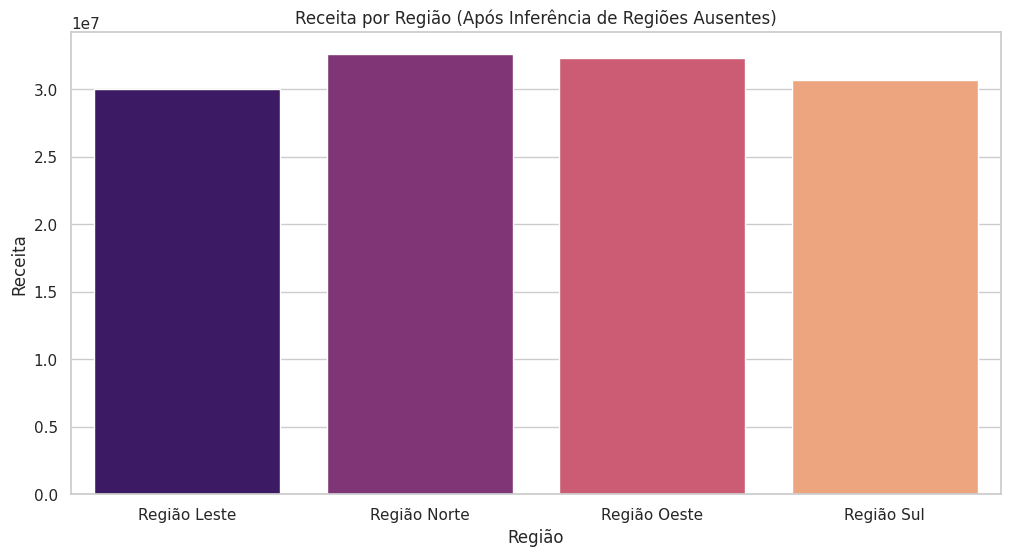

In [33]:
# Criar um dicionário para mapear produtos para suas regiões mais frequentes
produto_para_regiao_mais_frequente = frequencia_produto_regiao.idxmax(axis=1).to_dict()

# Preencher as regiões ausentes com base no produto mais frequente
dados_vendas['Região'] = dados_vendas.apply(
    lambda row: produto_para_regiao_mais_frequente[row['Produto']] if pd.isna(row['Região']) else row['Região'],
    axis=1
)

# Recalcular a receita por região após preencher os valores nulos com inferência
regiao_analise_inferida = dados_vendas.groupby('Região')['Receita'].sum().reset_index()

# Plotar a receita por região após inferência
plt.figure(figsize=(12, 6))
sns.barplot(data=regiao_analise_inferida, x='Região', y='Receita', hue='Região', palette='magma', dodge=False)
plt.title('Receita por Região (Após Inferência de Regiões Ausentes)')
plt.xlabel('Região')
plt.ylabel('Receita')
plt.legend([],[], frameon=False)
plt.show()

###Análise de Desempenho ao Longo do Tempo por Categoria
Analisar o desempenho das categorias de produtos ao longo do tempo para identificar tendências específicas por categoria.

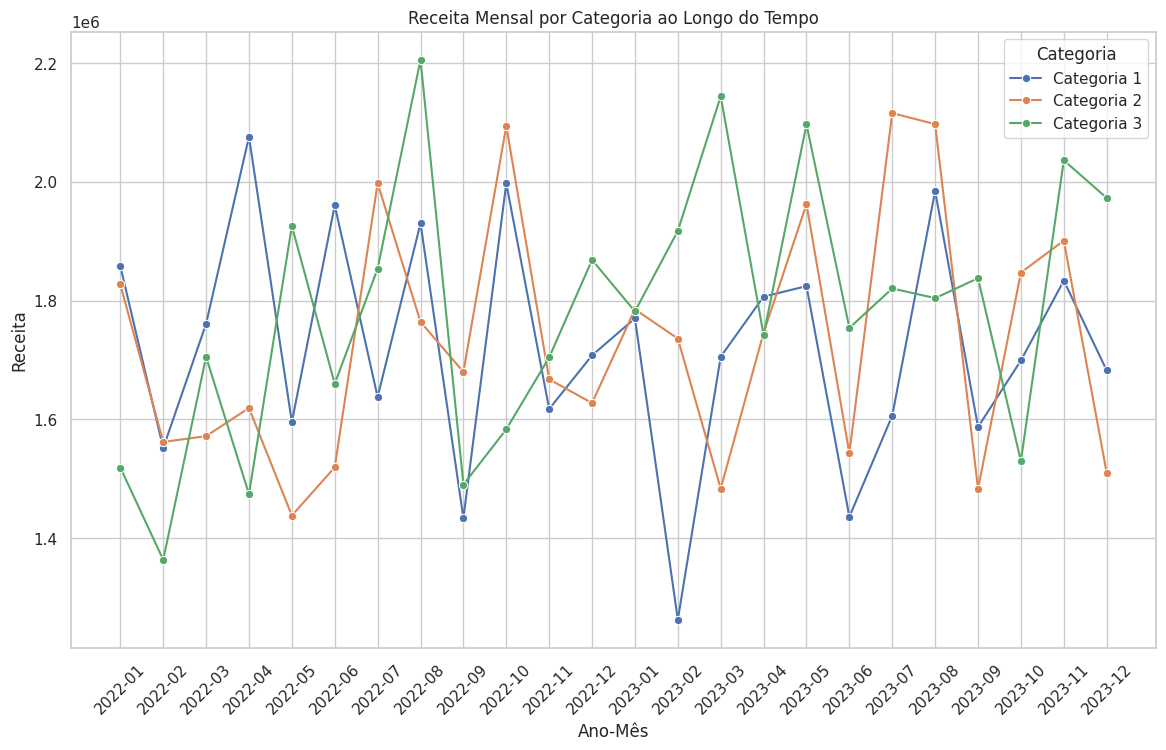

In [34]:
# Agrupar por ano, mês e categoria, e calcular a receita total para cada grupo
dados_vendas['AnoMes'] = dados_vendas['Data'].dt.to_period('M')
receita_categoria_mensal = dados_vendas.groupby(['AnoMes', 'Categoria'])['Receita'].sum().reset_index()

# Converter AnoMes para string para garantir que seja plotável
receita_categoria_mensal['AnoMes'] = receita_categoria_mensal['AnoMes'].astype(str)

# Plotar a receita mensal por categoria
plt.figure(figsize=(14, 8))
sns.lineplot(data=receita_categoria_mensal, x='AnoMes', y='Receita', hue='Categoria', marker='o')
plt.title('Receita Mensal por Categoria ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.legend(title='Categoria')
plt.show()

###Análise de Concentração de Receita
Verificar quais produtos ou categorias geram a maior parte da receita, ajudando a identificar os principais produtos.

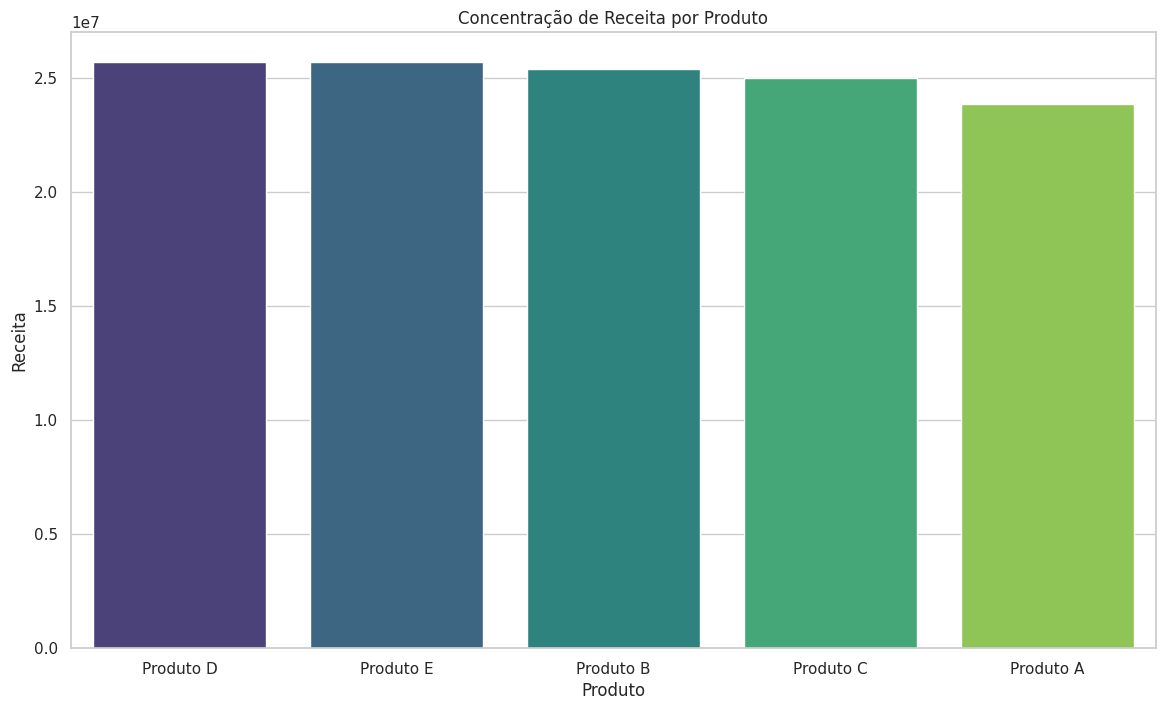

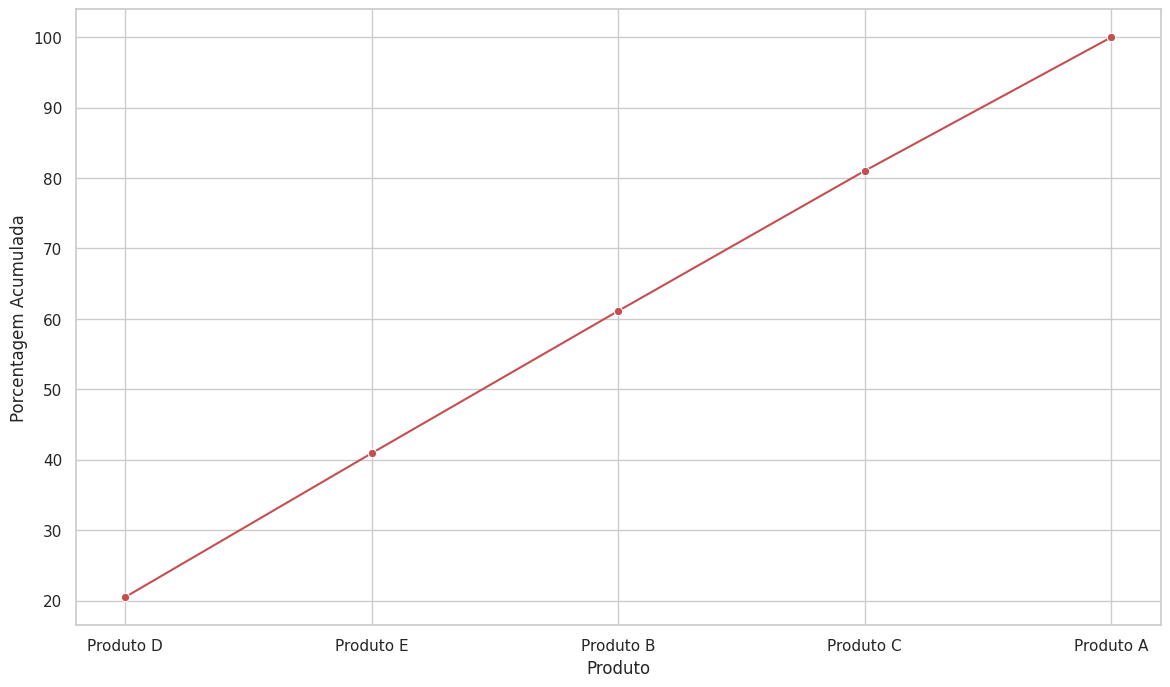

In [35]:
# Calcular a receita total por produto
receita_produto_total = dados_vendas.groupby('Produto')['Receita'].sum().reset_index()

# Ordenar os produtos pela receita total
receita_produto_total = receita_produto_total.sort_values(by='Receita', ascending=False)

# Calcular a porcentagem acumulada da receita
receita_produto_total['Porcentagem Acumulada'] = receita_produto_total['Receita'].cumsum() / receita_produto_total['Receita'].sum() * 100

# Plotar a curva de Pareto
plt.figure(figsize=(14, 8))
sns.barplot(data=receita_produto_total, x='Produto', y='Receita', hue='Produto', palette='viridis', dodge=False)
plt.ylabel('Receita')
plt.xlabel('Produto')
plt.title('Concentração de Receita por Produto')
plt.legend([],[], frameon=False)
plt.show()

# Adicionar a linha da porcentagem acumulada
plt.figure(figsize=(14, 8))
sns.lineplot(data=receita_produto_total, x='Produto', y='Porcentagem Acumulada', color='r', marker='o', sort=False)
plt.ylabel('Porcentagem Acumulada')
plt.show()

###Distribuição de Vendas por Intervalo de Preço
Analisar a distribuição das vendas em diferentes faixas de preço para entender a sensibilidade ao preço dos clientes.

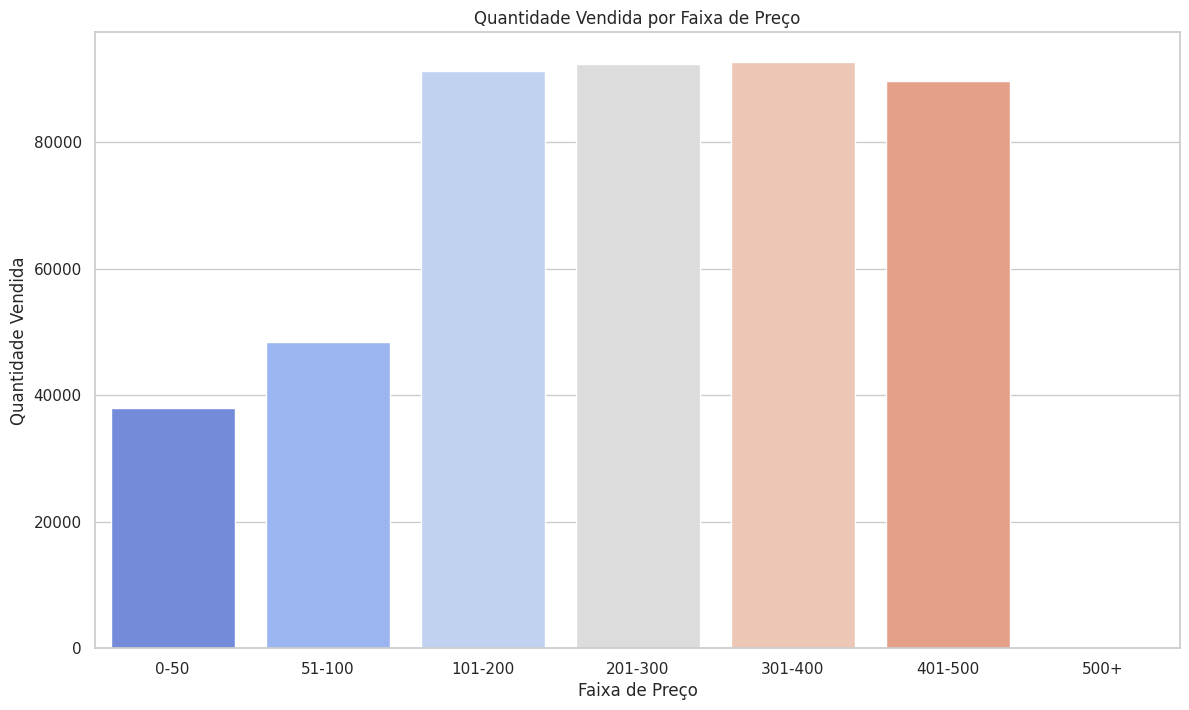

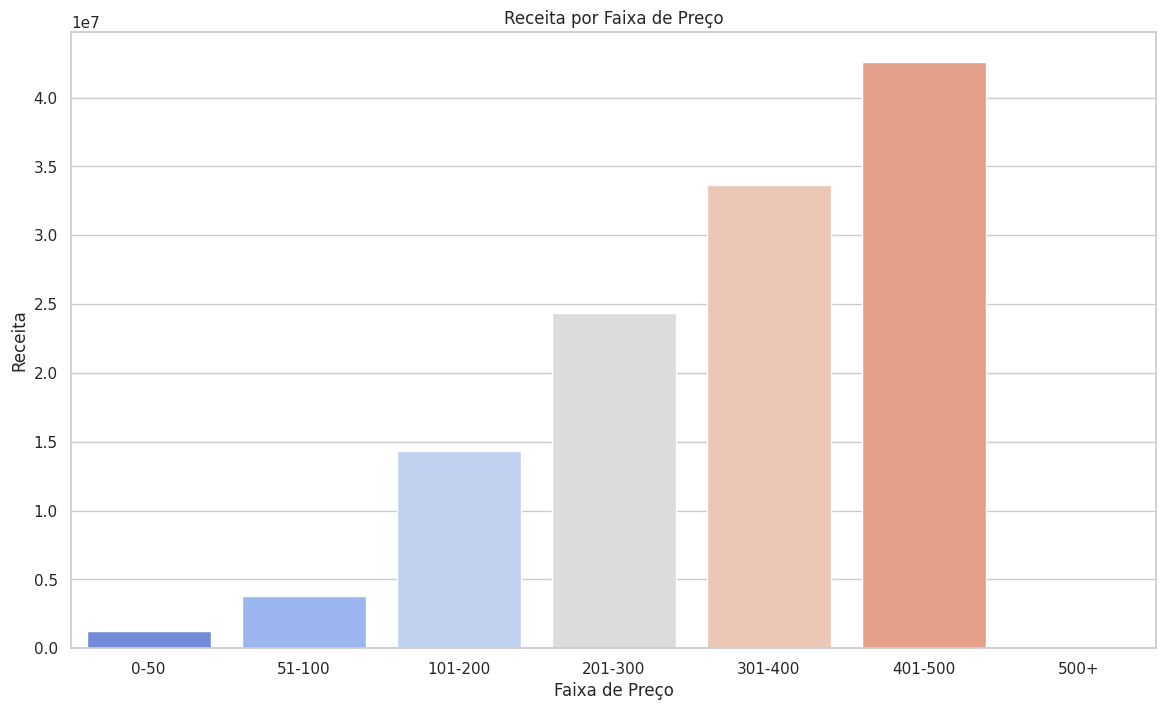

In [36]:
# Definir os intervalos de preço
bins = [0, 50, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-50', '51-100', '101-200', '201-300', '301-400', '401-500', '500+']

# Categorizar os preços em intervalos
dados_vendas['Faixa de Preço'] = pd.cut(dados_vendas['Preço'], bins=bins, labels=labels)

# Calcular a quantidade vendida e a receita por faixa de preço
analise_preco = dados_vendas.groupby('Faixa de Preço').agg({'Quantidade': 'sum', 'Receita': 'sum'}).reset_index()

# Plotar a quantidade vendida por faixa de preço
plt.figure(figsize=(14, 8))
sns.barplot(data=analise_preco, x='Faixa de Preço', y='Quantidade', hue='Faixa de Preço', palette='coolwarm', dodge=False)
plt.title('Quantidade Vendida por Faixa de Preço')
plt.xlabel('Faixa de Preço')
plt.ylabel('Quantidade Vendida')
plt.legend([],[], frameon=False)
plt.show()

# Plotar a receita por faixa de preço
plt.figure(figsize=(14, 8))
sns.barplot(data=analise_preco, x='Faixa de Preço', y='Receita', hue='Faixa de Preço', palette='coolwarm', dodge=False)
plt.title('Receita por Faixa de Preço')
plt.xlabel('Faixa de Preço')
plt.ylabel('Receita')
plt.legend([],[], frameon=False)
plt.show()

### Resumo das Principais Descobertas
Apresentar um resumo das principais descobertas da análise.

In [37]:
# Resumo das principais descobertas
print("### Tendências de Vendas ao Longo do Tempo")
print(receita_mensal.to_string(index=False))

print("\n### Receita e Quantidade Vendida por Produto")
print(produto_analise.to_string(index=False))

print("\n### Receita e Quantidade Vendida por Categoria")
print(categoria_analise.to_string(index=False))

print("\n### Estatísticas Descritivas dos Preços")
print(estatisticas_precos.to_string())

print("\n### Estatísticas Descritivas das Quantidades Vendidas")
print(estatisticas_quantidade.to_string())

print("\n### Receita por Região (Após Inferência de Regiões Ausentes)")
print(regiao_analise_inferida.to_string(index=False))

### Tendências de Vendas ao Longo do Tempo
 AnoMes      Receita
2022-01 5,204,470.72
2022-02 4,477,674.74
2022-03 5,038,198.67
2022-04 5,169,328.95
2022-05 4,959,532.81
2022-06 5,139,871.80
2022-07 5,489,324.95
2022-08 5,899,949.63
2022-09 4,604,233.74
2022-10 5,675,129.95
2022-11 4,989,571.34
2022-12 5,204,033.17
2023-01 5,337,310.22
2023-02 4,916,381.25
2023-03 5,333,194.07
2023-04 5,294,652.40
2023-05 5,883,520.41
2023-06 4,733,231.86
2023-07 5,542,428.35
2023-08 5,885,625.91
2023-09 4,908,201.53
2023-10 5,076,482.37
2023-11 5,770,848.83
2023-12 5,165,517.13

### Receita e Quantidade Vendida por Produto
  Produto       Receita  Quantidade
Produto A 23,851,095.28   90,486.00
Produto B 25,401,339.21   95,716.00
Produto C 25,021,212.27   95,058.00
Produto D 25,725,838.54   96,505.00
Produto E 25,699,229.50   97,297.00

### Receita e Quantidade Vendida por Categoria
  Categoria       Receita  Quantidade
Categoria 1 41,327,260.06  156,872.00
Categoria 2 41,579,945.23  160,958.00
Categori

###Desempenho por Produto e Categoria
Tabela com o desempenho de cada produto, mostrando a receita total e a quantidade vendida.

In [38]:
# Agrupar por produto e calcular a receita total e a quantidade vendida
desempenho_produto_categoria = dados_vendas.groupby('Produto').agg({
    'Receita': 'sum',
    'Quantidade': 'sum'
}).reset_index()

# Renomear as colunas para melhor entendimento
desempenho_produto_categoria.columns = ['Produto', 'Receita Total', 'Quantidade Vendida']

# Formatar os valores de receita para exibir com duas casas decimais e adicionar o símbolo de dólar
desempenho_produto_categoria['Receita Total'] = desempenho_produto_categoria['Receita Total'].apply(lambda x: f"${x:,.2f}")

# Exibir a tabela de desempenho
desempenho_produto_categoria

,Produto,Receita Total,Quantidade Vendida
0,Produto A,"$23,851,095.28","90,486.00"
1,Produto B,"$25,401,339.21","95,716.00"
2,Produto C,"$25,021,212.27","95,058.00"
3,Produto D,"$25,725,838.54","96,505.00"
4,Produto E,"$25,699,229.50","97,297.00"


### Exportação de Resultados
Exportar os dados analisados para um novo arquivo CSV.

In [22]:
dados_vendas.to_csv('dados_vendas_analisados.csv', index=False)

## Referências e Créditos

- Dados fornecidos por Daron Analytics.
- Análises realizadas utilizando pandas, matplotlib, e seaborn.